# Regularized linear regression

## 1. Introduction
The hypotesis function for the linear regression model is defined as:
$$ h_\theta(x) = \theta^Tx $$
where $\theta$ are optimized parameters that minimize the error between the model prediction and expected values. $x$ are the independent valiables or features.

## 1.1 Cost function and gradient

The cost function for regularized linear regression is expressed as:
$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right)^2 \right) + \frac{\lambda}{2m} \left( \sum_{j=1}^n \theta_j^2 \right)$$

where $m$ is the number of training example, $y^{(i)}$ is the expected values, and $h_{\theta}(x^{(i)})$ is the predicted values (or hypothesis).

The gradient or the derivative of the cost function wrt the parameters $\theta_{j}$ is defined as:
$$
\begin{align}
& \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} & \qquad \text{for } j = 0 \\
& \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j & \qquad \text{for } j \ge 1
\end{align}
$$

## 1.2. Calculating optimal $\theta_{j}$

To calculate the optimal parameters for $\theta_{j}$ that minimizes the cost function $(J)$, we will use the ```scipy.optimize.minimize``` function. Note that gradient descent could also be used but ```scipy.optimize.minimize``` gives access to more advanced optimization solvers.


## 2. Implementation

We will be implementing the regularized logistic regression since setting $\lambda = 0$ recovers the unregularized logistic regression.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from scipy import optimize

In [2]:
class LinearRegression():
    def __init__(self, maxiter=1000, learning_rate=0.001, lambda_=0.0, method='TNC'):
        self.learning_rate = learning_rate
        self.maxiter = maxiter
        self.history = list()
        self.weights = None
        self.lambda_ = lambda_
        self.method = method
        
    def _sigmoid(self, z):
        '''sigmoid funciton'''
        
        return 1./(1.+np.exp(-z))
    
    def _costFunction(self, weights, X, y):
        '''logistic regression cost function'''
        
        # number of training examples
        m = y.size
        
        # predictions
        pred = self._sigmoid(X.dot(weights))
        
        # cost function with regularization  
        costFunc = 1./(2.*m) * np.sum((X.dot(weights) - y)**2) + \
                    (self.lambda_/(2.0*m))*np.sum(weights[1:]**2)
        
        # calculate gradients with regularization
        grad = 1./m * (X.dot(weights) - y).dot(X) + (self.lambda_/m)*weights
        grad[0] = grad[0] - (self.lambda_/m)*weights[0]
        
        # cost function history
        self.history.append(costFunc)
        
        return costFunc, grad
    
    def _scipyOptimizer(self, X, y):
        '''uses scipy.optimize.minimize for calculating weights'''
        
        options= {'maxiter': self.maxiter}
        res = optimize.minimize(self._costFunction,
                                self.weights,
                                args=(X, y),
                                jac=True,
                                method='TNC',
                                options=options)
        
        # get results from scipy optimizer
        costFunc = res.fun
        self.weights = res.x
        return
    
    def _gradientDescent(self, X, y):
        '''gradient descent algorithm for calculating weights'''
        
        # number of training examples
        m = y.size
        
        # gradient descent iterations
        for i in range(self.maxiter):
            
            # evaluate cost function and gradients
            costFunc, grad = self._costFunction(self.weights, X, y)
            
            # update weights
            self.weights = self.weights - self.learning_rate/m * grad
        
    def fit(self, X, y):
        '''calculate weights'''
        
        # insert bias in first row
        X = np.insert(X, 0, 1, axis=1)
        
        # initialize weights
        self.weights = np.zeros(X.shape[1])
        
        # calculate optimized weights
        if self.method == 'gradientDescent':
            self._gradientDescent(X, y)
        else:
            self._scipyOptimizer(X, y)
            
    def predict(self, X):
        '''predict using optimized weights'''
        
        # insert bias in first row
        X = np.insert(X, 0, 1, axis=1)
    
        return np.dot(X,self.weights)

# Helper functions

In [3]:
def polyFeatures(X, deg):
    X_poly = np.zeros((X.shape[0], deg))
    
    for i in range(1, deg+1):
        X_poly[:, i-1] = (X**i).T
    return X_poly


def create_plots(X, y, theta, J_history, deg): 
    # setup X_linspace
    m = y.size
    X_linspace = np.linspace(X.min()-0.7, X.max()+0.3, num=100)
    X_linspace = np.stack([np.ones(m), X_linspace], axis=1)
    for i in range(2,deg+1):
        X_linspace = np.concatenate([X_linspace, (X_linspace[:,1]**i).reshape(-1,1)], axis=1)
    
    # make plots
    fig, axes = plt.subplots(1, 2, figsize=[10,4], dpi=100)
    axes[0].plot(X, y, 'ro', ms=6, mec='k', mew=1, label='Training data')
    y_preds = np.sum(X_linspace*theta, axis=1)
    axes[0].plot(X_linspace[:,1], y_preds, 'b-', label='Regression line')
    axes[1].plot( np.arange(len(J_history)), J_history, '-b' )
    axes[0].set(xlabel='X', ylabel='y')
    axes[1].set(xlabel='Iteration', ylabel='MSE Error')
    axes[0].legend(loc='best')    
    plt.show()

# Example 1: unregularized linear regression

Let's test out the algorithm we have put together so far on a toy dataset as shown below:

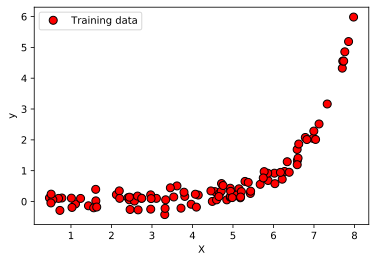

In [4]:
# create toy dataset
np.random.seed(2021)
X = 8 * np.random.rand(100) - 0
y = ( 0.2 * np.exp(X) + 20*np.random.randn(100) ) / 100.

plt.plot(X, y, 'ro', ms=8, mec='k', mew=1)
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['Training data'])
plt.show()

## Define and fit model

In [5]:
# reshape X to (m,n) needed for model
X = X[:, np.newaxis]

In [6]:
model = LinearRegression(maxiter=3000, lambda_=0.0, method='TNC')
model.fit(X, y)

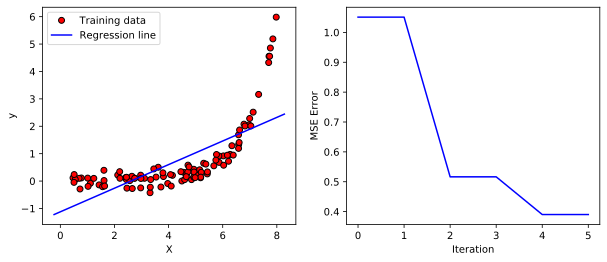

In [7]:
# make plots    
create_plots(X, y, model.weights, model.history, deg=1)

# Example 2: regularized linear regression with polynomial features

Let's test out the algorithm we have put together so far on a toy polynomial dataset as shown below:

In [8]:
deg = 5
X_poly = polyFeatures(X, deg)
model = LinearRegression(maxiter=3000, lambda_=100.0, method='TNC')
model.fit(X_poly, y)

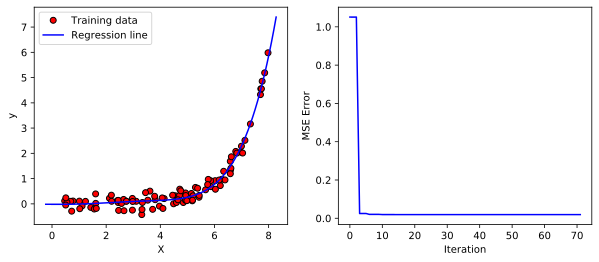

In [9]:
# make plots    
create_plots(X, y, model.weights, model.history, deg=deg)